House Price Prediction

1 .Collecting Data

✅ Tất cả thư viện đã được cài đặt!
🏠 CRAWLER BẤT ĐỘNG SẢN - BATDONGSAN.VN
📊 Tìm thấy 1 trang
📄 Đang crawl trang 1: https://batdongsan.vn/ban-nha-ho-chi-minh
   Tìm thấy 24 tin đăng
   Đã xử lý 10/24 tin
   Đã xử lý 20/24 tin
   Đã xử lý 24/24 tin
💾 Đã lưu dữ liệu tạm trang 1

✅ HOÀN THÀNH!
📊 Tổng số tin đăng: 24
📁 File output: batdongsan_data.csv

📋 PREVIEW DỮ LIỆU:
                                                Name  Price      Price_Text  \
0      🏘️ NHÀ MỚI Ở NGAY – GẦN CHỢ GÒ XOÀI, BÌNH TÂN  6.500  6 tỷ 500 triệu   
1  Nhà cũ tiện xây mới hẻm thông Hưng Phú P.Chánh...  4.980  4 tỷ 980 triệu   
2  Nhà mới đón Tết full nội thất hẻm 4m TSN TPhú ...  5.600  5 tỷ 600 triệu   
3  BÁN NHÀ 3 TẦNG, VÀO Ở NGAY, HẺM XE HƠI,  DƯƠNG...  7.300  7 tỷ 300 triệu   
4  Bán Nhà Tên Lửa siêu thoáng –  3 lầu chỉ 6.999...  6.999  6 tỷ 999 triệu   

   District  Acreage  Num_bedroom  Num_WC  \
0  Bình Tân     64.0          NaN     NaN   
1    Quận 8     60.0          3.0     3.0   
2   Tân Phú     32.0 

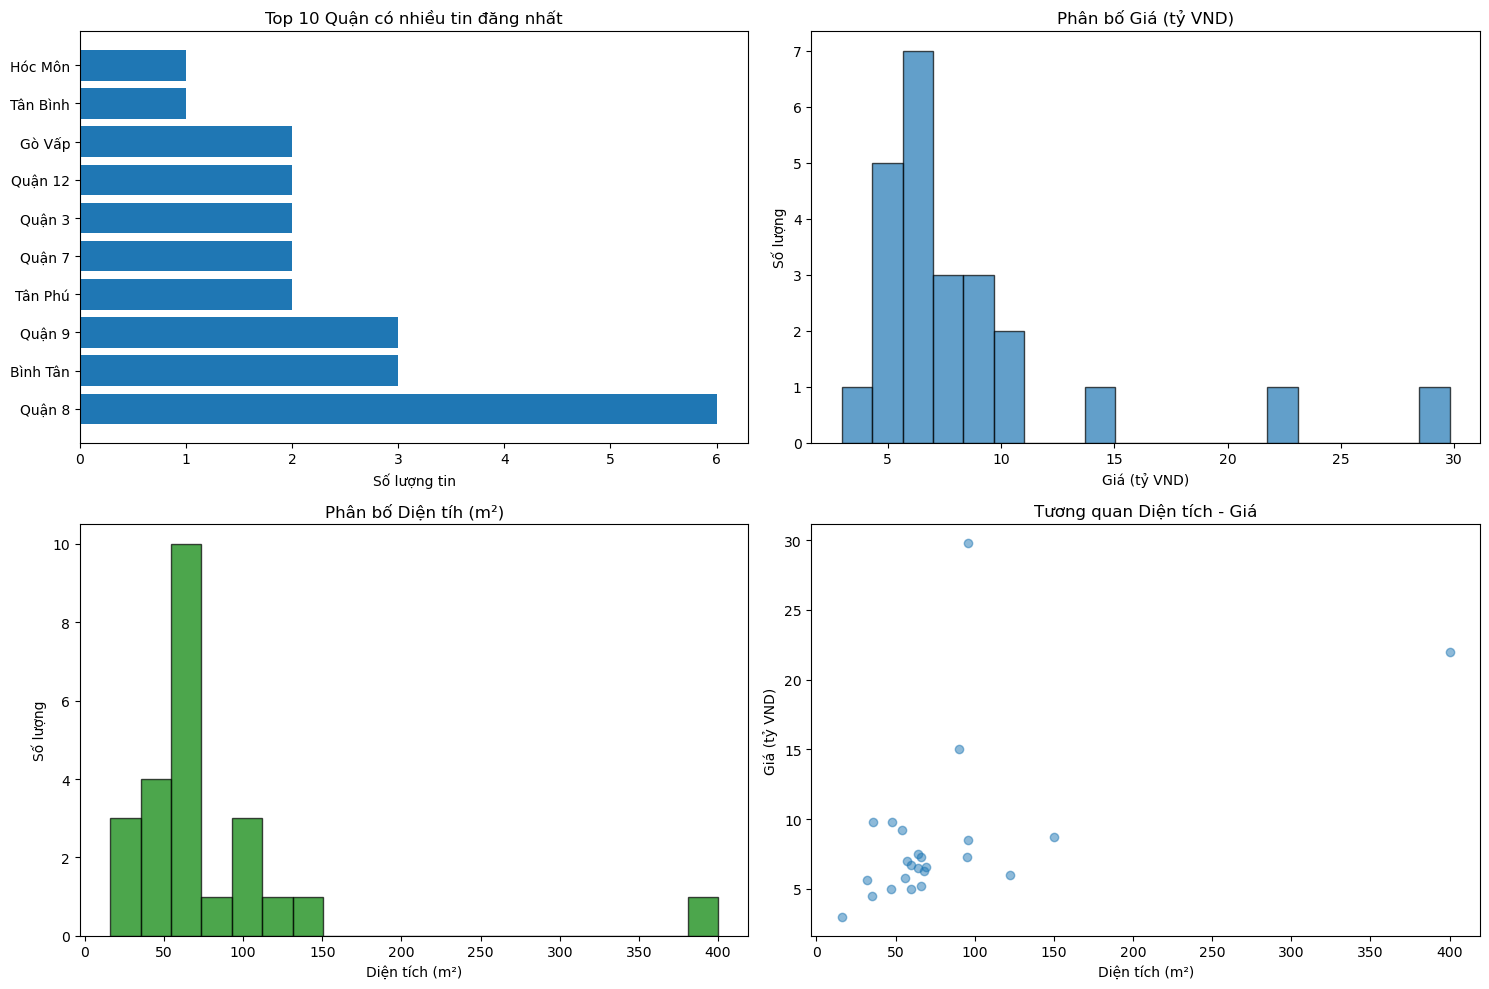


📈 Đã tạo biểu đồ: batdongsan_analysis.png
📄 Đã xuất báo cáo: batdongsan_report.txt


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urljoin
import time
warnings.filterwarnings('ignore')

# Thêm headers để tránh bị chặn
headers = {


    
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Accept-Language': 'vi-VN,vi;q=0.9,en-US;q=0.8,en;q=0.7',
    'Referer': 'https://batdongsan.vn/'
}

def get_total_pages():
    """Lấy tổng số trang từ trang đầu tiên"""
    url = "https://batdongsan.vn/ban-nha-ho-chi-minh"
    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        # Tìm phân trang
        pagination = soup.find('ul', class_='uk-pagination')
        if pagination:
            # Lấy tất cả các link phân trang
            page_links = pagination.find_all('a')
            page_numbers = []

            for link in page_links:
                href = link.get('href', '')
                if href and '/p' in href:
                    # Trích xuất số trang từ href
                    match = re.search(r'/p(\d+)', href)
                    if match:
                        page_numbers.append(int(match.group(1)))

            if page_numbers:
                return max(page_numbers)

        # Nếu không tìm thấy phân trang rõ ràng, trả về 1
        return 1

    except Exception as e:
        print(f"❌ Lỗi khi lấy số trang: {e}")
        return 1

def extract_price(price_text):
    """Trích xuất giá tiền từ chuỗi"""
    if not price_text:
        return None

    price_text = price_text.lower().strip()

    # Xử lý các định dạng giá
    price_text = price_text.replace('tỷ', 't').replace('tỉ', 't').replace('triệu', 'm')

    # Loại bỏ khoảng trắng
    price_text = price_text.replace(' ', '')

    # Tách số và đơn vị
    total_price = 0

    # Xử lý tỷ
    if 't' in price_text:
        parts = price_text.split('t')
        if parts[0]:
            try:
                total_price += float(parts[0].replace(',', '.')) * 1e9  # 1 tỷ = 1,000,000,000
            except:
                pass

        # Nếu có phần triệu sau tỷ
        if len(parts) > 1 and 'm' in parts[1]:
            million_part = parts[1].split('m')[0]
            if million_part:
                try:
                    total_price += float(million_part.replace(',', '.')) * 1e6  # 1 triệu = 1,000,000
                except:
                    pass
    elif 'm' in price_text:
        # Chỉ có triệu
        parts = price_text.split('m')
        if parts[0]:
            try:
                total_price += float(parts[0].replace(',', '.')) * 1e6
            except:
                pass

    # Trả về giá theo tỷ VND
    return total_price / 1e9 if total_price > 0 else None

def extract_area(area_text):
    """Trích xuất diện tích từ chuỗi"""
    if not area_text:
        return None

    try:
        # Tìm số trong chuỗi
        match = re.search(r'([\d\.\,]+)', area_text)
        if match:
            area_str = match.group(1).replace(',', '.')
            return float(area_str)
    except:
        pass

    return None

def extract_bedrooms(text):
    """Trích xuất số phòng ngủ từ chuỗi"""
    if not text:
        return None

    try:
        match = re.search(r'(\d+)\s*Phòng ngủ', text)
        if match:
            return int(match.group(1))
    except:
        pass

    return None

def extract_toilets(text):
    """Trích xuất số WC từ chuỗi"""
    if not text:
        return None

    try:
        match = re.search(r'(\d+)\s*WC', text)
        if match:
            return int(match.group(1))
    except:
        pass

    return None

def crawl_page(page_num):
    """Crawl một trang cụ thể"""
    if page_num == 1:
        url = "https://batdongsan.vn/ban-nha-ho-chi-minh"
    else:
        url = f"https://batdongsan.vn/ban-nha-ho-chi-minh/p{page_num}"

    print(f"📄 Đang crawl trang {page_num}: {url}")

    try:
        response = requests.get(url, headers=headers, timeout=15)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        # Tìm tất cả các thẻ card chứa thông tin bất động sản
        # Dựa vào HTML bạn cung cấp, class đúng là 'card-cm'
        property_cards = soup.find_all('a', class_='card-cm')

        if not property_cards:
            # Thử tìm bằng class khác
            property_cards = soup.find_all('div', class_='card-container')
            if property_cards:
                property_cards = property_cards[0].find_all('a', class_='card-cm')

        print(f"   Tìm thấy {len(property_cards)} tin đăng")

        page_data = []

        for idx, card in enumerate(property_cards, 1):
            try:
                # Tên bất động sản
                title_elem = card.find('h3', class_='title')
                title = title_elem.text.strip() if title_elem else "Không có tiêu đề"

                # Link chi tiết
                detail_url = card.get('href', '')
                if detail_url and not detail_url.startswith('http'):
                    detail_url = urljoin('https://batdongsan.vn', detail_url)

                # Địa chỉ (Quận)
                location_elem = card.find('div', class_='description')
                location_text = location_elem.text.strip() if location_elem else ""

                # Tách quận từ địa chỉ
                district = "Không xác định"
                if location_text:
                    parts = location_text.split(',')
                    if len(parts) > 0:
                        district = parts[0].strip()

                # Diện tích
                area = None
                area_elem = card.find('div', class_='description-item')
                if area_elem:
                    area_text = area_elem.text.strip()
                    area = extract_area(area_text)

                # Số phòng ngủ
                bedrooms = None
                bedroom_text = card.find(text=re.compile(r'\d+\s*Phòng ngủ'))
                if bedroom_text:
                    bedrooms = extract_bedrooms(bedroom_text)

                # Số WC
                toilets = None
                toilet_text = card.find(text=re.compile(r'\d+\s*WC'))
                if toilet_text:
                    toilets = extract_toilets(toilet_text)

                # Giá
                price = None
                price_elem = card.find('div', class_='price')
                if price_elem:
                    price_text = price_elem.text.strip()
                    price = extract_price(price_text)

                # Thời gian đăng
                time_elem = card.find('div', class_='time')
                post_time = time_elem.text.strip() if time_elem else "Không rõ"

                # Tạo dictionary dữ liệu
                property_data = {
                    'Name': title,
                    'Price': price,
                    'Price_Text': price_elem.text.strip() if price_elem else "",
                    'District': district,
                    'Acreage': area,
                    'Num_bedroom': bedrooms,
                    'Num_WC': toilets,
                    'Address': location_text,
                    'Post_Time': post_time,
                    'Link': detail_url
                }

                page_data.append(property_data)

                if idx % 10 == 0 or idx == len(property_cards):
                    print(f"   Đã xử lý {idx}/{len(property_cards)} tin")

            except Exception as e:
                print(f"   ⚠️ Lỗi xử lý tin {idx}: {str(e)[:50]}")
                continue

        return page_data

    except Exception as e:
        print(f"❌ Lỗi khi crawl trang {page_num}: {e}")
        return []

def main():
    """Hàm chính để crawl dữ liệu"""
    print("="*60)
    print("🏠 CRAWLER BẤT ĐỘNG SẢN - BATDONGSAN.VN")
    print("="*60)

    # Lấy tổng số trang
    total_pages = get_total_pages()
    print(f"📊 Tìm thấy {total_pages} trang")

    # Hỏi người dùng muốn crawl bao nhiêu trang
    try:
        pages_to_crawl = int(input(f"👉 Nhập số trang muốn crawl (1-{total_pages}): "))
        pages_to_crawl = min(max(1, pages_to_crawl), total_pages)
    except:
        pages_to_crawl = 3  # Mặc định crawl 3 trang
        print(f"⚠️ Sử dụng mặc định: {pages_to_crawl} trang")

    all_data = []

    # Crawl từng trang
    for page_num in range(1, pages_to_crawl + 1):
        page_data = crawl_page(page_num)
        all_data.extend(page_data)

        # Lưu tạm sau mỗi trang
        if page_data:
            temp_df = pd.DataFrame(page_data)
            temp_df.to_csv(f'temp_page_{page_num}.csv', index=False, encoding='utf-8-sig')
            print(f"💾 Đã lưu dữ liệu tạm trang {page_num}")

        # Chờ giữa các trang để tránh bị chặn
        if page_num < pages_to_crawl:
            wait_time = 2  # 2 giây
            print(f"⏳ Chờ {wait_time} giây...")
            time.sleep(wait_time)

    # Tạo DataFrame tổng
    if all_data:
        df = pd.DataFrame(all_data)

        # Lưu file CSV
        output_file = 'batdongsan_data.csv'
        df.to_csv(output_file, index=False, encoding='utf-8-sig')

        print(f"\n✅ HOÀN THÀNH!")
        print(f"📊 Tổng số tin đăng: {len(df)}")
        print(f"📁 File output: {output_file}")

        # Hiển thị preview
        print("\n📋 PREVIEW DỮ LIỆU:")
        print(df.head())

        # Thống kê cơ bản
        print("\n📈 THỐNG KÊ CƠ BẢN:")
        print(f"• Số quận có tin đăng: {df['District'].nunique()}")

        if 'Price' in df.columns:
            valid_prices = df['Price'].dropna()
            if len(valid_prices) > 0:
                print(f"• Giá trung bình: {valid_prices.mean():.2f} tỷ VND")
                print(f"• Giá cao nhất: {valid_prices.max():.2f} tỷ VND")
                print(f"• Giá thấp nhất: {valid_prices.min():.2f} tỷ VND")

        if 'Acreage' in df.columns:
            valid_areas = df['Acreage'].dropna()
            if len(valid_areas) > 0:
                print(f"• Diện tích trung bình: {valid_areas.mean():.1f} m²")

        # Phân tích thêm
        analyze_data(df)

    else:
        print("❌ Không có dữ liệu nào được crawl")

def analyze_data(df):
    """Phân tích và visualize dữ liệu"""
    print("\n📊 PHÂN TÍCH DỮ LIỆU:")

    # Làm sạch dữ liệu
    df_clean = df.copy()

    # Chuyển đổi kiểu dữ liệu
    numeric_cols = ['Price', 'Acreage', 'Num_bedroom', 'Num_WC']
    for col in numeric_cols:
        if col in df_clean.columns:
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

    # 1. Phân tích theo quận
    print("\n1. PHÂN BỐ THEO QUẬN:")
    district_counts = df_clean['District'].value_counts()
    print(district_counts.head(10))

    # 2. Phân tích giá
    if 'Price' in df_clean.columns:
        print("\n2. PHÂN TÍCH GIÁ:")
        price_stats = df_clean['Price'].describe()
        print(price_stats)

    # 3. Vẽ biểu đồ
    try:
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))

        # Biểu đồ 1: Top 10 quận có nhiều tin nhất
        if len(district_counts) > 0:
            top_10_districts = district_counts.head(10)
            axes[0, 0].barh(top_10_districts.index, top_10_districts.values)
            axes[0, 0].set_title('Top 10 Quận có nhiều tin đăng nhất')
            axes[0, 0].set_xlabel('Số lượng tin')

        # Biểu đồ 2: Phân bố giá
        if 'Price' in df_clean.columns:
            valid_prices = df_clean['Price'].dropna()
            if len(valid_prices) > 0:
                axes[0, 1].hist(valid_prices, bins=20, edgecolor='black', alpha=0.7)
                axes[0, 1].set_title('Phân bố Giá (tỷ VND)')
                axes[0, 1].set_xlabel('Giá (tỷ VND)')
                axes[0, 1].set_ylabel('Số lượng')

        # Biểu đồ 3: Phân bố diện tích
        if 'Acreage' in df_clean.columns:
            valid_areas = df_clean['Acreage'].dropna()
            if len(valid_areas) > 0:
                axes[1, 0].hist(valid_areas, bins=20, edgecolor='black', alpha=0.7, color='green')
                axes[1, 0].set_title('Phân bố Diện tíh (m²)')
                axes[1, 0].set_xlabel('Diện tích (m²)')
                axes[1, 0].set_ylabel('Số lượng')

        # Biểu đồ 4: Tương quan diện tích - giá
        if 'Price' in df_clean.columns and 'Acreage' in df_clean.columns:
            valid_data = df_clean.dropna(subset=['Price', 'Acreage'])
            if len(valid_data) > 0:
                axes[1, 1].scatter(valid_data['Acreage'], valid_data['Price'], alpha=0.5)
                axes[1, 1].set_title('Tương quan Diện tích - Giá')
                axes[1, 1].set_xlabel('Diện tích (m²)')
                axes[1, 1].set_ylabel('Giá (tỷ VND)')

        plt.tight_layout()
        plt.savefig('batdongsan_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

        print(f"\n📈 Đã tạo biểu đồ: batdongsan_analysis.png")

    except Exception as e:
        print(f"⚠️ Lỗi khi vẽ biểu đồ: {e}")

    # 4. Xuất báo cáo chi tiết
    export_report(df_clean)

def export_report(df):
    """Xuất báo cáo chi tiết"""
    report_file = "batdongsan_report.txt"

    with open(report_file, 'w', encoding='utf-8') as f:
        f.write("="*60 + "\n")
        f.write("BÁO CÁO PHÂN TÍCH DỮ LIỆU BẤT ĐỘNG SẢN\n")
        f.write("="*60 + "\n\n")

        f.write(f"Tổng số tin đăng: {len(df)}\n")
        f.write(f"Thời gian crawl: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")

        f.write("1. PHÂN BỐ THEO QUẬN:\n")
        district_counts = df['District'].value_counts()
        for district, count in district_counts.head(10).items():
            f.write(f"   • {district}: {count} tin ({count/len(df)*100:.1f}%)\n")

        f.write("\n2. THỐNG KÊ GIÁ:\n")
        if 'Price' in df.columns:
            valid_prices = df['Price'].dropna()
            if len(valid_prices) > 0:
                f.write(f"   • Trung bình: {valid_prices.mean():.2f} tỷ VND\n")
                f.write(f"   • Trung vị: {valid_prices.median():.2f} tỷ VND\n")
                f.write(f"   • Cao nhất: {valid_prices.max():.2f} tỷ VND\n")
                f.write(f"   • Thấp nhất: {valid_prices.min():.2f} tỷ VND\n")

        f.write("\n3. THỐNG KÊ DIỆN TÍCH:\n")
        if 'Acreage' in df.columns:
            valid_areas = df['Acreage'].dropna()
            if len(valid_areas) > 0:
                f.write(f"   • Trung bình: {valid_areas.mean():.1f} m²\n")
                f.write(f"   • Phổ biến nhất: {valid_areas.mode().iloc[0] if not valid_areas.mode().empty else 'N/A'} m²\n")

        f.write("\n4. THỐNG KÊ PHÒNG NGỦ:\n")
        if 'Num_bedroom' in df.columns:
            valid_bedrooms = df['Num_bedroom'].dropna()
            if len(valid_bedrooms) > 0:
                bedroom_counts = valid_bedrooms.value_counts().sort_index()
                for beds, count in bedroom_counts.items():
                    f.write(f"   • {int(beds)} phòng: {count} tin\n")

        f.write("\n5. MẪU DỮ LIỆU (5 dòng đầu):\n")
        sample_cols = ['Name', 'Price', 'District', 'Acreage', 'Num_bedroom', 'Link']
        sample_df = df[sample_cols].head() if all(col in df.columns for col in sample_cols) else df.head()
        f.write(sample_df.to_string())

    print(f"📄 Đã xuất báo cáo: {report_file}")

# Chạy chương trình
if __name__ == "__main__":
    # Kiểm tra cài đặt thư viện
    try:
        import requests
        from bs4 import BeautifulSoup
        import pandas as pd

        print("✅ Tất cả thư viện đã được cài đặt!")
        main()

    except ImportError as e:
        print(f"❌ Thiếu thư viện: {e}")
        print("👉 Chạy lệnh sau để cài đặt:")
        print("pip install requests beautifulsoup4 pandas matplotlib seaborn numpy")

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time
import concurrent.futures
import random
from urllib.parse import urljoin

# Cấu hình
START_PAGE = 1
END_PAGE = 1300
MAX_WORKERS = 10  # Số luồng chạy cùng lúc (Đừng để quá cao kẻo bị chặn IP, 10 là an toàn)
OUTPUT_FILE = 'batdongsan_raw_data.csv'

# Headers giả lập trình duyệt
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Referer': 'https://batdongsan.vn/'
}

# Các hàm xử lý dữ liệu (Giữ nguyên logic của bạn vì đang chạy tốt)
def extract_price(price_text):
    if not price_text: return None
    price_text = price_text.lower().strip().replace('tỷ', 't').replace('tỉ', 't').replace('triệu', 'm').replace(' ', '')
    total_price = 0
    if 't' in price_text:
        parts = price_text.split('t')
        if parts[0]:
            try: total_price += float(parts[0].replace(',', '.')) * 1e9
            except: pass
        if len(parts) > 1 and 'm' in parts[1]:
            try: total_price += float(parts[1].split('m')[0].replace(',', '.')) * 1e6
            except: pass
    elif 'm' in price_text:
        try: total_price += float(price_text.split('m')[0].replace(',', '.')) * 1e6
        except: pass
    return total_price / 1e9 if total_price > 0 else None

def extract_area(area_text):
    if not area_text: return None
    try:
        match = re.search(r'([\d\.\,]+)', area_text)
        if match: return float(match.group(1).replace(',', '.'))
    except: pass
    return None

def extract_bedrooms(text):
    if not text: return None
    try:
        match = re.search(r'(\d+)\s*Phòng ngủ', text)
        if match: return int(match.group(1))
    except: pass
    return None

def extract_toilets(text):
    if not text: return None
    try:
        match = re.search(r'(\d+)\s*WC', text)
        if match: return int(match.group(1))
    except: pass
    return None

def crawl_page(page_num, session):
    """
    Hàm crawl một trang đơn lẻ, sử dụng session chung
    """
    if page_num == 1:
        url = "https://batdongsan.vn/ban-nha-ho-chi-minh"
    else:
        url = f"https://batdongsan.vn/ban-nha-ho-chi-minh/p{page_num}"

    try:
        # Random sleep nhẹ để giảm tải server
        time.sleep(random.uniform(0.5, 1.5))

        response = session.get(url, headers=headers, timeout=20)

        if response.status_code != 200:
            print(f"❌ Trang {page_num}: Lỗi Status {response.status_code}")
            return []

        soup = BeautifulSoup(response.text, 'html.parser')

        # Logic tìm thẻ card
        property_cards = soup.find_all('a', class_='card-cm')
        if not property_cards:
            property_cards = soup.find_all('div', class_='card-container')
            if property_cards:
                property_cards = property_cards[0].find_all('a', class_='card-cm')

        page_data = []
        for card in property_cards:
            try:
                # Trích xuất thông tin cơ bản
                title_elem = card.find('h3', class_='title')
                title = title_elem.text.strip() if title_elem else ""

                detail_url = card.get('href', '')
                if detail_url and not detail_url.startswith('http'):
                    detail_url = urljoin('https://batdongsan.vn', detail_url)

                location_elem = card.find('div', class_='description')
                location_text = location_elem.text.strip() if location_elem else ""
                district = location_text.split(',')[0].strip() if location_text else ""

                area_elem = card.find('div', class_='description-item')
                area_text = area_elem.text.strip() if area_elem else ""

                bedroom_text = card.find(text=re.compile(r'\d+\s*Phòng ngủ'))
                toilet_text = card.find(text=re.compile(r'\d+\s*WC'))

                price_elem = card.find('div', class_='price')
                price_raw = price_elem.text.strip() if price_elem else ""

                time_elem = card.find('div', class_='time')
                post_time = time_elem.text.strip() if time_elem else ""

                # Gom vào dict
                item = {
                    'Page': page_num,
                    'Title': title,
                    'Price_Raw': price_raw,
                    'Price_Billion': extract_price(price_raw),
                    'District': district,
                    'Area_m2': extract_area(area_text),
                    'Bedrooms': extract_bedrooms(bedroom_text),
                    'Toilets': extract_toilets(toilet_text),
                    'Address': location_text,
                    'Post_Time': post_time,
                    'Link': detail_url
                }
                page_data.append(item)
            except Exception:
                continue

        print(f"✅ Trang {page_num}: Lấy được {len(page_data)} tin")
        return page_data

    except Exception as e:
        print(f"⚠️ Trang {page_num} lỗi: {str(e)[:50]}")
        return []

def main():
    print("="*50)
    print(f"🚀 BẮT ĐẦU CRAWL DATA THÔ: {START_PAGE} -> {END_PAGE}")
    print(f"⚡ Số luồng (Threads): {MAX_WORKERS}")
    print("="*50)

    all_results = []
    start_time = time.time()

    # Tạo Session để tái sử dụng kết nối (Tăng tốc độ)
    session = requests.Session()

    # Sử dụng ThreadPoolExecutor để chạy đa luồng
    with concurrent.futures.ThreadPoolExecutor(max_workers=MAX_WORKERS) as executor:
        # Tạo danh sách các tác vụ cần làm (future objects)
        future_to_page = {
            executor.submit(crawl_page, page, session): page
            for page in range(START_PAGE, END_PAGE + 1)
        }

        # Xử lý kết quả khi từng luồng hoàn thành
        completed_count = 0
        total_tasks = len(future_to_page)

        for future in concurrent.futures.as_completed(future_to_page):
            page = future_to_page[future]
            try:
                data = future.result()
                if data:
                    all_results.extend(data)
            except Exception as exc:
                print(f"❌ Trang {page} sinh ra ngoại lệ: {exc}")

            completed_count += 1
            # Cập nhật tiến độ mỗi 50 trang
            if completed_count % 50 == 0:
                print(f"📊 Tiến độ: {completed_count}/{total_tasks} trang. Tổng tin: {len(all_results)}")

    # Lưu kết quả
    print("\n💾 Đang lưu dữ liệu vào CSV...")
    df = pd.DataFrame(all_results)

    if not df.empty:
        # Sắp xếp lại cột cho dễ nhìn
        cols = ['Page', 'Title', 'Price_Raw', 'Price_Billion', 'Area_m2', 'District', 'Address', 'Bedrooms', 'Toilets', 'Post_Time', 'Link']
        # Chỉ lấy các cột có trong df (đề phòng trường hợp lỗi)
        existing_cols = [c for c in cols if c in df.columns]
        df = df[existing_cols]

        df.to_csv(OUTPUT_FILE, index=False, encoding='utf-8-sig')
        print(f"✅ HOÀN THÀNH! File đã lưu: {OUTPUT_FILE}")
        print(f"📈 Tổng số dòng: {len(df)}")
    else:
        print("❌ Không thu thập được dữ liệu nào.")

    print(f"⏱️ Tổng thời gian chạy: {int(time.time() - start_time)} giây")

if __name__ == "__main__":
    main()

🚀 BẮT ĐẦU CRAWL DATA THÔ: 1 -> 1300
⚡ Số luồng (Threads): 10
✅ Trang 5: Lấy được 24 tin
✅ Trang 8: Lấy được 24 tin
✅ Trang 7: Lấy được 24 tin
✅ Trang 1: Lấy được 24 tin
✅ Trang 6: Lấy được 24 tin
✅ Trang 10: Lấy được 24 tin
✅ Trang 9: Lấy được 24 tin
✅ Trang 2: Lấy được 24 tin
✅ Trang 3: Lấy được 24 tin
✅ Trang 4: Lấy được 24 tin
✅ Trang 11: Lấy được 24 tin
✅ Trang 13: Lấy được 24 tin
✅ Trang 12: Lấy được 24 tin
✅ Trang 17: Lấy được 24 tin
✅ Trang 14: Lấy được 24 tin✅ Trang 16: Lấy được 24 tin

✅ Trang 19: Lấy được 24 tin
✅ Trang 15: Lấy được 24 tin
✅ Trang 21: Lấy được 24 tin
✅ Trang 18: Lấy được 24 tin
✅ Trang 20: Lấy được 24 tin
✅ Trang 22: Lấy được 24 tin
✅ Trang 24: Lấy được 24 tin
✅ Trang 23: Lấy được 24 tin
✅ Trang 29: Lấy được 24 tin
✅ Trang 28: Lấy được 24 tin
✅ Trang 27: Lấy được 24 tin
✅ Trang 26: Lấy được 24 tin
✅ Trang 25: Lấy được 24 tin
✅ Trang 31: Lấy được 24 tin
✅ Trang 32: Lấy được 24 tin
✅ Trang 30: Lấy được 24 tin
✅ Trang 33: Lấy được 24 tin
✅ Trang 34: Lấy được 24 

Dánh id cho mỗi cột

In [ ]:
import pandas as pd

# 1. Đọc file CSV hiện tại
input_file = 'batdongsan_raw_data.csv' # Tên file cũ của bạn
output_file = 'batdongsan_data_with_id.csv' # Tên file mới sẽ lưu

print("⏳ Đang đọc dữ liệu...")
df = pd.read_csv(input_file)

# 2. Thêm cột ID
# range(1, len(df) + 1): Tạo dãy số từ 1 đến hết bảng
# df.insert(0, ...): Chèn vào vị trí đầu tiên (cột số 0)
df.insert(0, 'id', range(1, len(df) + 1))

# 3. Lưu ra file mới
print(f"💾 Đang lưu file mới: {output_file}...")
df.to_csv(output_file, index=False, encoding='utf-8-sig')

# 4. Kiểm tra kết quả
print("✅ Đã xong! Preview 5 dòng đầu:")
print(df[['id', 'Title', 'Price_Raw']].head())

⏳ Đang đọc dữ liệu...
💾 Đang lưu file mới: batdongsan_data_with_id.csv...
✅ Đã xong! Preview 5 dòng đầu:
   id                                              Title       Price_Raw
0   1  SIÊU PHẨM GÓC 2 MẶT TIỀN – TRƯƠNG THỊ NHƯ, XUÂ...  7 tỷ 990 triệu
1   2  BÁN GẤP NHÀ MẶT TIỀN HIỆP THÀNH 17 – TRUNG TÂM...  7 tỷ 890 triệu
2   3  HOT – HÀNG HIẾM GIỮA QUẬN 12 BÁN XƯỞNG HẺM XE ...           20 tỷ
3   4  Bán nhà mặt tiền 50x120m giá 95 tỷ Đườn...           95 tỷ
4   5  Bán nhà mặt tiền 23x99m giá 58 tỷ Đường...           58 tỷ


thêm trường description

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import concurrent.futures
import time
import random
import os

# --- CẤU HÌNH ---
INPUT_FILE = 'batdongsan_data_with_id.csv'  # File CSV đã có cột ID và Link
OUTPUT_FILE = 'batdongsan_full_desc.csv'    # File kết quả đầu ra
MAX_WORKERS = 8      # Số luồng (Để 8 là vừa phải, server vẫn chịu tốt)
SAVE_BATCH = 500     # Cứ xong 500 link thì lưu file 1 lần (để lỡ lỗi không mất hết)

# Headers giả lập trình duyệt
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
    'Referer': 'https://batdongsan.vn/'
}

def get_description(url, session):
    """
    Hàm vào link chi tiết lấy description từ thẻ <div id="more1">
    """
    if not url or pd.isna(url):
        return ""

    try:
        # Ngủ ngẫu nhiên 0.5 - 1.5 giây để giảm tải server
        time.sleep(random.uniform(0.5, 1.5))

        response = session.get(url, headers=headers, timeout=10)
        if response.status_code != 200:
            return "Lỗi truy cập"

        soup = BeautifulSoup(response.text, 'html.parser')

        # 1. Tìm thẻ div có id="more1" (Chứa full nội dung ẩn)
        desc_div = soup.find('div', id='more1')

        # Fallback: Nếu không thấy more1, thử tìm more (nội dung hiển thị rút gọn)
        if not desc_div:
            desc_div = soup.find('div', id='more')

        if desc_div:
            # get_text(separator='\n') sẽ thay thế thẻ <br> và </p> bằng xuống dòng
            # strip() để cắt khoảng trắng đầu đuôi
            content = desc_div.get_text(separator='\n').strip()

            # Xử lý thêm: Xóa các dòng trống quá nhiều
            lines = [line.strip() for line in content.split('\n') if line.strip()]
            return '\n'.join(lines)

        return "Không có mô tả"

    except Exception as e:
        return f"Lỗi code: {str(e)}"

def process_row(row, session):
    """Hàm xử lý cho từng dòng trong dataframe"""
    row_id = row['id']
    url = row['Link']
    desc = get_description(url, session)
    return row_id, desc

def main():
    print("⏳ Đang đọc file dữ liệu...")
    try:
        df = pd.read_csv(INPUT_FILE)
        print(f"📊 Tổng số dòng cần crawl: {len(df)}")
    except FileNotFoundError:
        print("❌ Không tìm thấy file input. Hãy chắc chắn tên file đúng.")
        return

    # Kiểm tra xem đã crawl dở chưa (để chạy tiếp thay vì chạy lại từ đầu)
    processed_ids = set()
    if os.path.exists(OUTPUT_FILE):
        df_done = pd.read_csv(OUTPUT_FILE)
        if 'id' in df_done.columns:
            processed_ids = set(df_done['id'])
            print(f"🔄 Đã tìm thấy file cũ, tiếp tục crawl từ dòng thứ {len(processed_ids)}...")

    # Lọc ra những dòng chưa crawl
    # Chỉ lấy các dòng có ID chưa nằm trong processed_ids
    df_to_process = df[~df['id'].isin(processed_ids)]

    if df_to_process.empty:
        print("✅ Đã crawl xong hết rồi!")
        return

    print(f"🚀 Bắt đầu crawl {len(df_to_process)} dòng còn lại...")
    print(f"⚡ Số luồng: {MAX_WORKERS}")

    session = requests.Session()
    results = []
    count = 0

    # Chuyển DataFrame thành list dict để dễ xử lý
    rows_to_process = df_to_process.to_dict('records')

    with concurrent.futures.ThreadPoolExecutor(max_workers=MAX_WORKERS) as executor:
        # Submit các task
        future_to_row = {executor.submit(process_row, row, session): row for row in rows_to_process}

        for future in concurrent.futures.as_completed(future_to_row):
            try:
                r_id, desc = future.result()
                results.append({'id': r_id, 'Description': desc})
                count += 1

                # In tiến độ
                if count % 10 == 0:
                    print(f"✅ Đã xử lý: {count} tin", end='\r')

                # Cứ mỗi SAVE_BATCH (500) tin thì lưu file một lần
                if count % SAVE_BATCH == 0 or count == len(rows_to_process):
                    # Tạo dataframe từ kết quả mới
                    temp_df = pd.DataFrame(results)

                    # Nếu file chưa tồn tại thì ghi mới (kèm header)
                    # Nếu file đã tồn tại thì ghi nối tiếp (không ghi header)
                    header_mode = not os.path.exists(OUTPUT_FILE)
                    temp_df.to_csv(OUTPUT_FILE, mode='a', index=False, header=header_mode, encoding='utf-8-sig')

                    print(f"\n💾 Đã lưu checkpoint ({count} dòng mới)...")
                    results = [] # Reset buffer sau khi lưu

            except Exception as exc:
                print(f"\n❌ Có lỗi ngoại lệ: {exc}")

    # Lưu nốt những dòng còn lại trong buffer (nếu có)
    if results:
        temp_df = pd.DataFrame(results)
        header_mode = not os.path.exists(OUTPUT_FILE)
        temp_df.to_csv(OUTPUT_FILE, mode='a', index=False, header=header_mode, encoding='utf-8-sig')
        print("\n✅ ĐÃ LƯU XONG TOÀN BỘ!")

    print("\n🔗 BƯỚC CUỐI: GHÉP DỮ LIỆU")
    # Đọc file gốc và file description vừa crawl để ghép lại
    df_org = pd.read_csv(INPUT_FILE)
    df_desc = pd.read_csv(OUTPUT_FILE)

    # Merge dựa trên cột id
    df_final = pd.merge(df_org, df_desc, on='id', how='left')

    final_filename = 'batdongsan_data_FINAL.csv'
    df_final.to_csv(final_filename, index=False, encoding='utf-8-sig')
    print(f"🎉 FILE CUỐI CÙNG CỦA BẠN: {final_filename}")

if __name__ == "__main__":
    main()

✅ Đã xử lý: 2000 tin
💾 Đã lưu checkpoint (2000 dòng mới)...
✅ Đã xử lý: 2500 tin
💾 Đã lưu checkpoint (2500 dòng mới)...
✅ Đã xử lý: 3000 tin
💾 Đã lưu checkpoint (3000 dòng mới)...
✅ Đã xử lý: 3500 tin
💾 Đã lưu checkpoint (3500 dòng mới)...
✅ Đã xử lý: 4000 tin
💾 Đã lưu checkpoint (4000 dòng mới)...
✅ Đã xử lý: 4500 tin
💾 Đã lưu checkpoint (4500 dòng mới)...
✅ Đã xử lý: 5000 tin
💾 Đã lưu checkpoint (5000 dòng mới)...
✅ Đã xử lý: 5500 tin
💾 Đã lưu checkpoint (5500 dòng mới)...
✅ Đã xử lý: 6000 tin
💾 Đã lưu checkpoint (6000 dòng mới)...
✅ Đã xử lý: 6500 tin
💾 Đã lưu checkpoint (6500 dòng mới)...
✅ Đã xử lý: 7000 tin
💾 Đã lưu checkpoint (7000 dòng mới)...
✅ Đã xử lý: 7500 tin
💾 Đã lưu checkpoint (7500 dòng mới)...
✅ Đã xử lý: 8000 tin
💾 Đã lưu checkpoint (8000 dòng mới)...
✅ Đã xử lý: 8500 tin
💾 Đã lưu checkpoint (8500 dòng mới)...
✅ Đã xử lý: 9000 tin
💾 Đã lưu checkpoint (9000 dòng mới)...
✅ Đã xử lý: 9500 tin
💾 Đã lưu checkpoint (9500 dòng mới)...
✅ Đã xử lý: 10000 tin
💾 Đã lưu checkpoin